# Loading Dataset

In [1]:
# importing nacessary libraries|
import os
import pandas as pd
import numpy as np

In [2]:
# ignoring unnacessary warnings from displaying
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# location for all dataset files
files = ['Normal', 'COVID', 'Lung_Opacity','Viral Pneumonia']
path = "../dataset/COVID-19_Radiography_Dataset"
data_dir = os.path.join(path)

In [4]:
# getting path for all files
data = []
for id, level in enumerate(files):
    for file in os.listdir(os.path.join(data_dir, level+'/'+'images')):
        data.append([level +'/' +'images'+ '/'+file, level])

In [5]:
# loading the data and classes for that perticular file
data = pd.DataFrame(data, columns = ['image_file', 'corona_result'])

data['path'] = path + '/' +data['image_file']
data['corona_result'] = data['corona_result'].map({'Normal': 'Normal', 'COVID': 'Covid_positive', 'Lung_Opacity':'Lung_Opacity', 'Viral Pneumonia':'Viral_Pneumonia'})

data.head()

image_file corona_result  \
0      Normal/images/Normal-1.png        Normal   
1     Normal/images/Normal-10.png        Normal   
2    Normal/images/Normal-100.png        Normal   
3   Normal/images/Normal-1000.png        Normal   
4  Normal/images/Normal-10000.png        Normal   

                                                path  
0  ../dataset/COVID-19_Radiography_Dataset/Normal...  
1  ../dataset/COVID-19_Radiography_Dataset/Normal...  
2  ../dataset/COVID-19_Radiography_Dataset/Normal...  
3  ../dataset/COVID-19_Radiography_Dataset/Normal...  
4  ../dataset/COVID-19_Radiography_Dataset/Normal...

In [6]:
# Checking for duplicates
print('Number of Duplicated Samples: %d'%(data.duplicated().sum()))
print('Number of Total Samples: %d'%(len(data)))

Number of Duplicated Samples: 0
Number of Total Samples: 21165


# EDA

In [7]:
# importing nacessary libraries for EDA
import plotly.express as px
import plotly.figure_factory as ff
from PIL import Image

In [8]:
# ploting the class distribution for all classes
no_of_samples = 21165

df = pd.DataFrame()
df['corona_result'] = ['Normal', 'Covid_positive', 'Lung_Opacity', 'Viral_Pneumonia']
df['Count'] = [len(data[data['corona_result'] == 'Normal']), len(data[data['corona_result'] == 'Covid_positive']), len(data[data['corona_result'] == 'Lung_Opacity']), len(data[data['corona_result'] == 'Viral_Pneumonia'])]
df = df.sort_values(by = ['Count'], ascending = False)

fig = px.bar(df, x = 'corona_result', y = 'Count', 
             color = "corona_result",  width = 600, 
             color_continuous_scale='BrBg')

fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)

fig.show()

In [9]:
# resizing all images to 75x75 format for better and fast processing
data['image'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((256,256))))

In [10]:
# getting the mean, max and min values to check the distribution according to the classes
mean_val = []
std_dev_val = []
max_val = []
min_val = []

for i in range(0, no_of_samples):
    mean_val.append(data['image'][i].mean())
    std_dev_val.append(np.std(data['image'][i]))
    max_val.append(data['image'][i].max())
    min_val.append(data['image'][i].min())

imageEDA = data.loc[:,['image','corona_result','path']]
imageEDA['mean'] = mean_val
imageEDA['stedev'] = std_dev_val
imageEDA['max'] = max_val
imageEDA['min'] = min_val

imageEDA['subt_mean'] = imageEDA['mean'].mean() - imageEDA['mean']
imageEDA['subt_max'] = imageEDA['max'].mean() - imageEDA['max']

In [11]:
Names = ['Normal','Covid','Lung opacity','Pneumonia']

In [12]:
# mean values according to the classes
mean_normal = imageEDA["mean"].loc[(imageEDA["corona_result"] == "Normal")].to_numpy()
mean_covid = imageEDA["mean"].loc[(imageEDA["corona_result"] == "Covid_positive")].to_numpy()
mean_opacity = imageEDA["mean"].loc[(imageEDA["corona_result"] == "Lung_Opacity")].to_numpy()
mean_pneumonia = imageEDA["mean"].loc[(imageEDA["corona_result"] == "Viral_Pneumonia")].to_numpy()
mean_list = [mean_normal,mean_covid,mean_opacity,mean_pneumonia]

In [13]:
# max values according to the classes
max_normal = imageEDA["max"].loc[(imageEDA["corona_result"] == "Normal")].to_numpy()
max_covid = imageEDA["max"].loc[(imageEDA["corona_result"] == "Covid_positive")].to_numpy()
max_opacity = imageEDA["max"].loc[(imageEDA["corona_result"] == "Lung_Opacity")].to_numpy()
max_pneumonia = imageEDA["max"].loc[(imageEDA["corona_result"] == "Viral_Pneumonia")].to_numpy()
max_list = [max_normal,max_covid,max_opacity,max_pneumonia]

In [14]:
# min values according to the classes
min_normal = imageEDA["min"].loc[(imageEDA["corona_result"] == "Normal")].to_numpy()
min_covid = imageEDA["min"].loc[(imageEDA["corona_result"] == "Covid_positive")].to_numpy()
min_opacity = imageEDA["min"].loc[(imageEDA["corona_result"] == "Lung_Opacity")].to_numpy()
min_pneumonia = imageEDA["min"].loc[(imageEDA["corona_result"] == "Viral_Pneumonia")].to_numpy()
min_list = [min_normal,min_covid,min_opacity,min_pneumonia]

In [15]:
# STD values according to the classes
std_normal = imageEDA["stedev"].loc[(imageEDA["corona_result"] == "Normal")].to_numpy()
std_covid = imageEDA["stedev"].loc[(imageEDA["corona_result"] == "Covid_positive")].to_numpy()
std_opacity = imageEDA["stedev"].loc[(imageEDA["corona_result"] == "Lung_Opacity")].to_numpy()
std_pneumonia = imageEDA["stedev"].loc[(imageEDA["corona_result"] == "Viral_Pneumonia")].to_numpy()
std_list = [std_normal,std_covid,std_opacity,std_pneumonia]

In [16]:
# min max plot function
def min_max_plot(data,name,title):
    colors = ['#04EEFF', '#4BBBFF', '#F5F232', '#7FFF00']

    # Create distplot with curve_type set to 'normal'
    fig = ff.create_distplot(data, name, show_hist=False, colors = colors)
    fig.update_layout(title_text=title,
                      titlefont={'size': 20},
                     template="plotly_dark",
                     width=800,height=600,)
    fig.show()

In [17]:
min_max_plot(max_list,Names,"Images Colour Max Value Distribution by Class")

In [18]:
min_max_plot(min_list,Names,"Images Colour Min Value Distribution by Class")

In [19]:
min_max_plot(mean_list,Names,"Images Colour Mean Value Distribution by Class")

In [20]:
# plotting class distribution 
fig = px.scatter(imageEDA, x="mean", y="stedev", color='corona_result',color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(title_text="Mean and Standard Deviation of Image Samples",
                  xaxis_title='Image Channel Colour Mean',
                  yaxis_title='Image Channel Colour Standard Deviation',
                  titlefont={'size': 20},
                  template="plotly_dark",
                  width=800,height=600,)
fig.show()

# Visulizing the images

In [21]:
# importing nacessary libraries
import matplotlib.pyplot as plt
import cv2

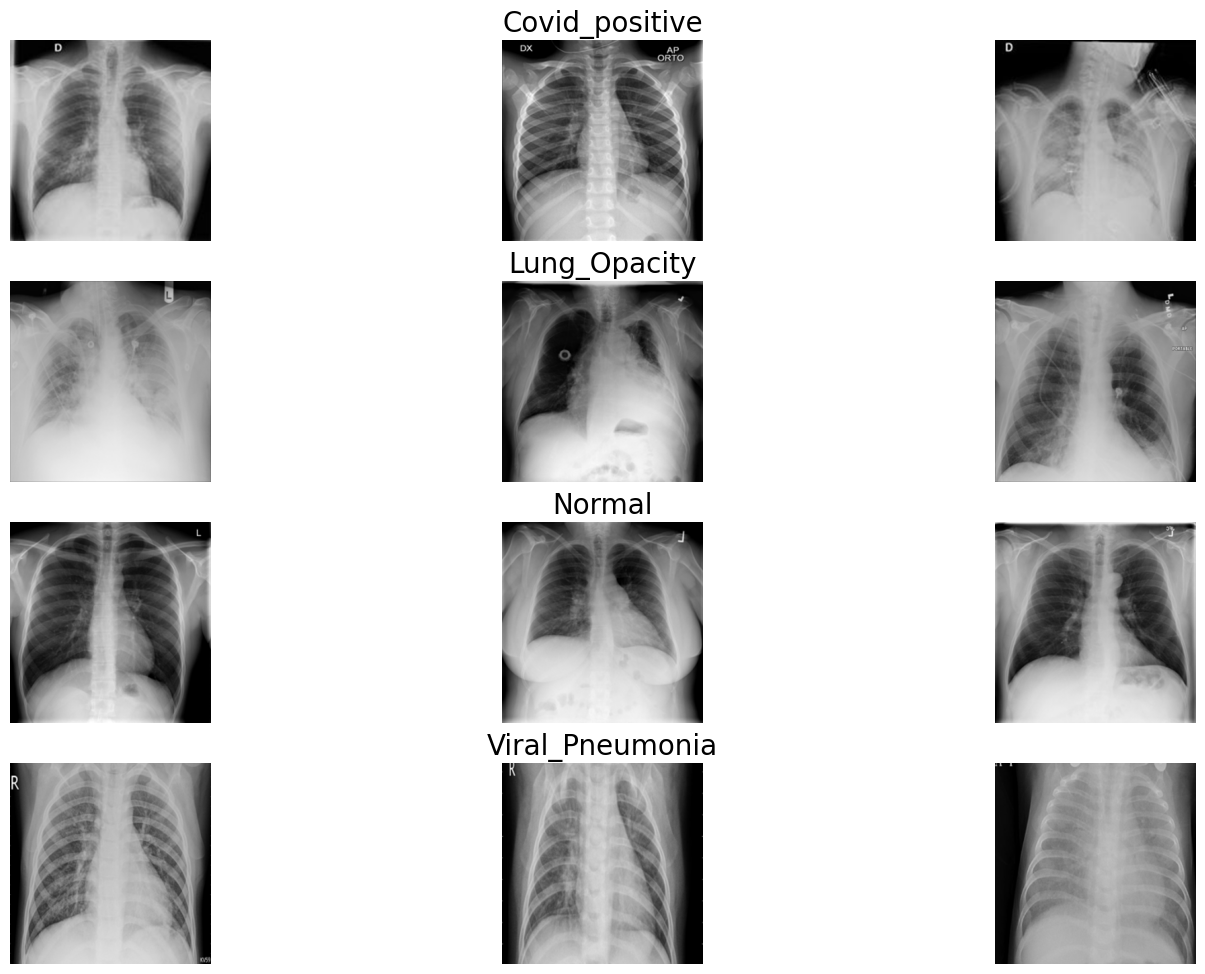

In [22]:
# ploting 3 random samples from all classes
n_samples = 3

fig, m_axs = plt.subplots(4, n_samples, figsize = (6*n_samples, 3*4))

for n_axs, (type_name, type_rows) in zip(m_axs, data.sort_values(['corona_result']).groupby('corona_result')):
    n_axs[1].set_title(type_name, fontsize = 20)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state = 1234).iterrows()):       
        picture = c_row['path']
        image = cv2.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')

In [23]:
# function to do random analysis of the image
def random_analysis(image_path):

    image = cv2.imread(image_path)

    # create figure
    fig = plt.figure(figsize=(10, 7))

    # setting values to rows and column variables
    rows = 2
    columns = 3

    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)
    plt.title('Original ', fontsize = 14)

    plt.imshow(image)
    plt.axis('off')


    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)

    # showing image
    plt.title('B channel', fontsize = 14)
    plt.imshow(image[ : , : , 0])
    plt.axis('off')


    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 3)

    img = cv2.imread(image_path)
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
    plt.title("Ben Graham's Method", fontsize = 14)
    plt.imshow(img)
    plt.axis('off')
    
    list_text = image_path.split("/")

    print("\n-----------------------------{}-----------------------------\n".format("IMAGE DETAILS" + " ( " + list_text[5].upper() + " )"))

    print('Image Shape: {}'.format(image.shape))
    print('Image Height: {}'.format(image.shape[0]))
    print('Image Width: {}'.format(image.shape[1]))
    print('Image Dimension: {}'.format(image.ndim))
    print('Image Size: {}kb'.format(image.size//1024))
    print('Image Data Type: {}'.format(image.dtype))
    print('Maximum RGB value of the image: {}'.format(image.max()))
    print('Minimum RGB value of the image: {}'.format(image.min()))

In [24]:
list_images_sample = ["../dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-1003.png",
                     "../dataset/COVID-19_Radiography_Dataset/Normal/images/Normal-10004.png",
                     "../dataset/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-1000.png",
                     "../dataset/COVID-19_Radiography_Dataset/COVID/images/COVID-100.png"]


-----------------------------IMAGE DETAILS ( VIRAL PNEUMONIA-1003.PNG )-----------------------------

Image Shape: (299, 299, 3)
Image Height: 299
Image Width: 299
Image Dimension: 3
Image Size: 261kb
Image Data Type: uint8
Maximum RGB value of the image: 243
Minimum RGB value of the image: 0


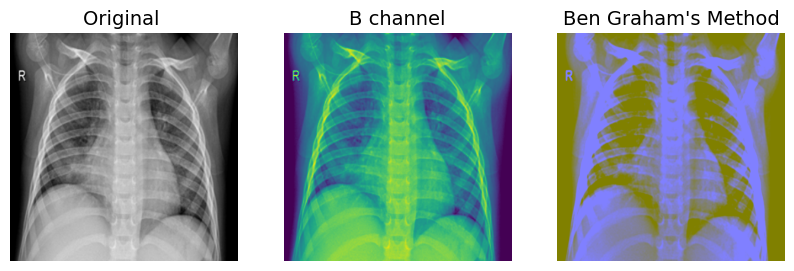

In [25]:
random_analysis(list_images_sample[0])


-----------------------------IMAGE DETAILS ( NORMAL-10004.PNG )-----------------------------

Image Shape: (299, 299, 3)
Image Height: 299
Image Width: 299
Image Dimension: 3
Image Size: 261kb
Image Data Type: uint8
Maximum RGB value of the image: 250
Minimum RGB value of the image: 0


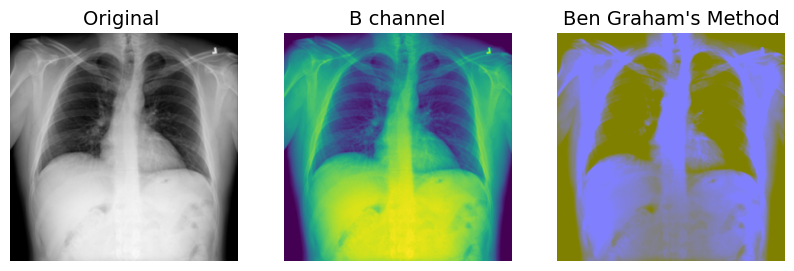

In [26]:
random_analysis(list_images_sample[1])


-----------------------------IMAGE DETAILS ( LUNG_OPACITY-1000.PNG )-----------------------------

Image Shape: (299, 299, 3)
Image Height: 299
Image Width: 299
Image Dimension: 3
Image Size: 261kb
Image Data Type: uint8
Maximum RGB value of the image: 224
Minimum RGB value of the image: 0


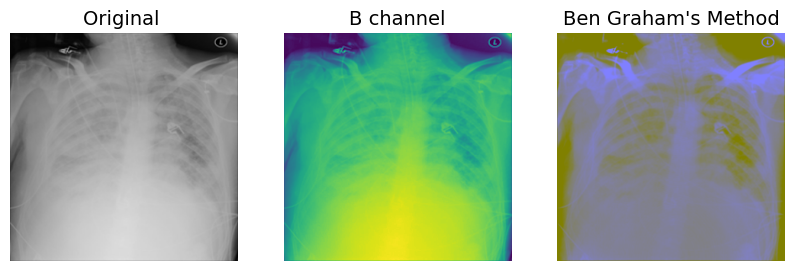

In [27]:
random_analysis(list_images_sample[2])


-----------------------------IMAGE DETAILS ( COVID-100.PNG )-----------------------------

Image Shape: (299, 299, 3)
Image Height: 299
Image Width: 299
Image Dimension: 3
Image Size: 261kb
Image Data Type: uint8
Maximum RGB value of the image: 255
Minimum RGB value of the image: 0


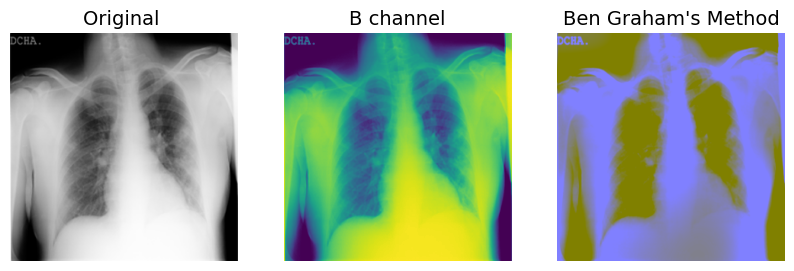

In [28]:
random_analysis(list_images_sample[3])

In [29]:
# function to plot multiple images for better visulization
def plot_multiple_img(img_matrix_list, title_list, ncols, main_title = ""):
    
    fig, axis = plt.subplots(figsize = (15, 8), nrows = 2, ncols = ncols, squeeze = False)
    fig.suptitle(main_title, fontsize = 18)
    fig.subplots_adjust(wspace = 0.3)
    fig.subplots_adjust(hspace = 0.3)
    
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        axis[i // ncols][i % ncols].imshow(img)
        axis[i // ncols][i % ncols].set_title(title, fontsize = 15)
        
    plt.show()

## Augmentations

In [30]:
# importing Augmentation library
import albumentations as A

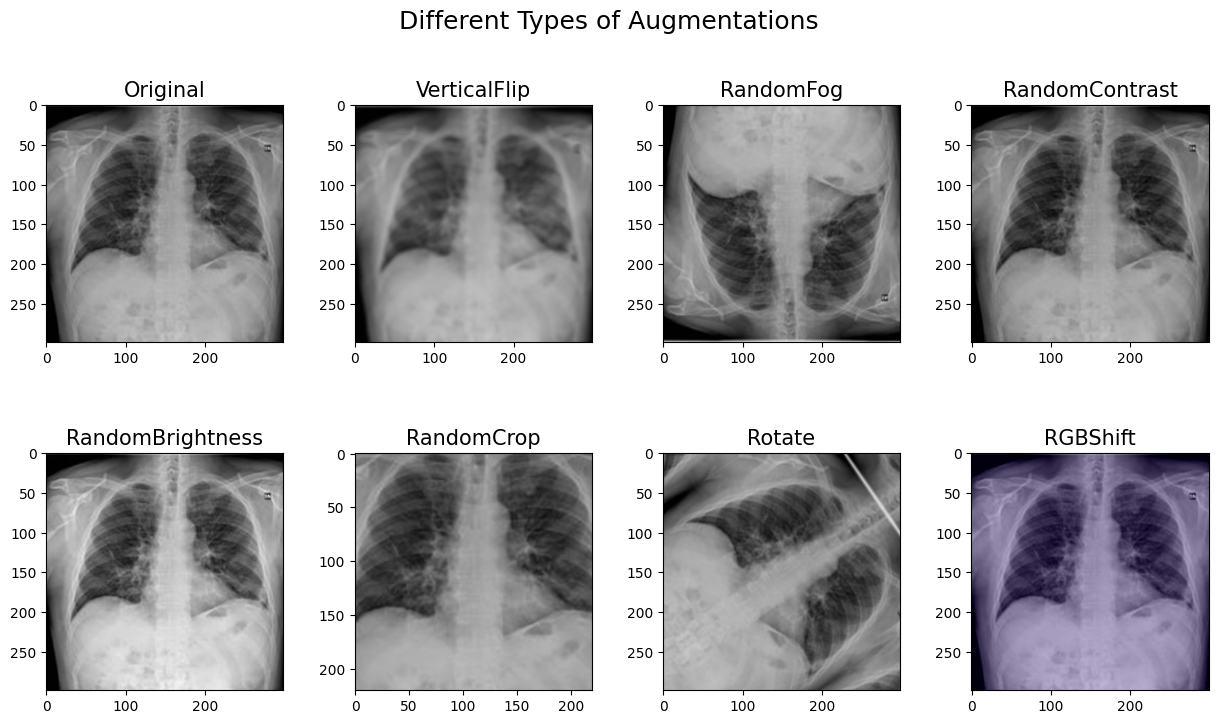

In [31]:
# performing Augmentations for a random image
chosen_image = cv2.imread("../dataset/COVID-19_Radiography_Dataset/COVID/images/COVID-101.png")

albumentation_list = [A.RandomFog(p = 1),A.VerticalFlip(p = 1), A.RandomBrightness(p = 1),A.RandomContrast(limit = 0.6, p = 1),
                      A.RandomCrop(p = 1,height = 220, width = 220),
                      A.Rotate(p = 1, limit = 90), A.RGBShift(p = 1)]

img_matrix_list = []
bboxes_list = []
for aug_type in albumentation_list:
    img = aug_type(image = chosen_image)['image']
    img_matrix_list.append(img)

img_matrix_list.insert(0,chosen_image)    

titles_list = ["Original", "VerticalFlip", "RandomFog", "RandomContrast", "RandomBrightness", "RandomCrop", "Rotate", "RGBShift"]

plot_multiple_img(img_matrix_list, titles_list, ncols = 4, main_title = "Different Types of Augmentations")

# Model Building

## Preparing the data for model

### Preprocess the data

In [32]:
import PIL
from PIL import Image, ImageOps

In [33]:
# Data Preprocessing
def preprocess_image(image_path, target_size):
    img = Image.open(image_path)
    img = ImageOps.grayscale(img)  # Convert to grayscale
    img = img.resize(target_size, PIL.Image.Resampling.LANCZOS)
    img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    return img

In [34]:
all_data = []

# Set target image size
target_size = (70, 70)

# Storing images and their labels into a list for further Train Test split
{'Normal': 'Normal', 'COVID': 'Covid_positive', 'Lung_Opacity':'Lung_Opacity', 'Viral Pneumonia':'Viral_Pneumonia'}
for i in range(len(data)):
    image = preprocess_image(data['path'][i], target_size)
    
    if data['corona_result'][i] == "Covid_positive":
        label = 'COVID'
    else:
        label = 'non-COVID'
    all_data.append([image, label])

In [35]:
x = []
y = []

for image, label in all_data:
    x.append(image)
    y.append(label)

# Converting to Numpy Array    
x = np.array(x)
y = np.array(y)

In [36]:
X_list = np.array(x.tolist())
y = np.array(y)

# Flatten the images
X_flatten = X_list.reshape(X_list.shape[0], -1)  # Flatten each image into a 1D array

## Train Test split

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X_flatten, y, test_size = 0.2, random_state = 42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(16932, 4900) (4233, 4900) (16932,) (4233,)


In [39]:
# Encode labels (COVID and non-COVID) into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [40]:
# from sklearn.utils import shuffle
# from imblearn.over_sampling import SMOTE

In [41]:
# # Apply oversampling using SMOTE
# smote = SMOTE(sampling_strategy='minority')
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

## Models

### Nacessary function for the analysis of the model

In [42]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
def print_cm(y_test,y_pred):
    # Decode the numerical predictions back to labels
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    
    # Plot confusion matrix
    cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_labels))
    cm.plot()

    # Generate a classification report
    report = classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_, output_dict=True)

    # Access individual metrics
    accuracy = report['accuracy']
    covid_precision = report['COVID']['precision']
    covid_recall = report['COVID']['recall']
    covid_f1_score = report['COVID']['f1-score']
    covid_support = report['COVID']['support']

    non_covid_precision = report['non-COVID']['precision']
    non_covid_recall = report['non-COVID']['recall']
    non_covid_f1_score = report['non-COVID']['f1-score']
    non_covid_support = report['non-COVID']['support']

    print(f'Accuracy: {accuracy}')
    print(f'COVID Precision: {covid_precision}')
    print(f'COVID Recall: {covid_recall}')
    print(f'COVID F1 Score: {covid_f1_score}')
    print(f'COVID Support: {covid_support}')
    print(f'Non-COVID Precision: {non_covid_precision}')
    print(f'Non-COVID Recall: {non_covid_recall}')
    print(f'Non-COVID F1 Score: {non_covid_f1_score}')
    print(f'Non-COVID Support: {non_covid_support}')

### LGBM model

In [44]:
from lightgbm import LGBMClassifier

In [45]:
# defining the LGBM model
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(x_train, y_train_encoded)

# predicting using LGBM model
y_pred_lgbm = lgbm_classifier.predict(x_test)

[LightGBM] [Info] Number of positive: 14046, number of negative: 2886
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.887525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1094237
[LightGBM] [Info] Number of data points in the train set: 16932, number of used features: 4900
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.829554 -> initscore=1.582466
[LightGBM] [Info] Start training from score 1.582466


Accuracy: 0.9600755965036617
COVID Precision: 0.9621087314662273
COVID Recall: 0.8
COVID F1 Score: 0.8735976065818999
COVID Support: 730.0
Non-COVID Precision: 0.9597352454495311
Non-COVID Recall: 0.9934341992577791
Non-COVID F1 Score: 0.9762940103801374
Non-COVID Support: 3503.0


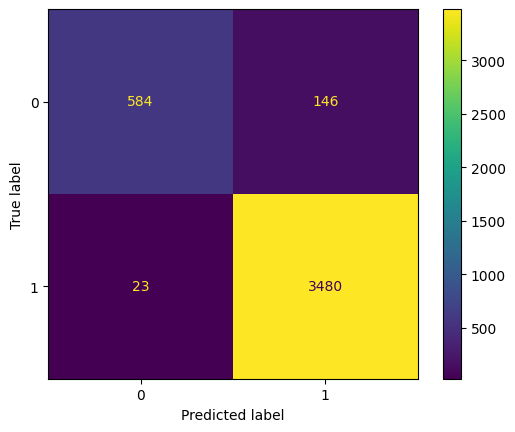

In [46]:
print_cm(y_test,y_pred_lgbm)

### Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# checking using randomforest
rf = RandomForestClassifier()
rf.fit(x_train, y_train_encoded)

# predicting using LGBM model
y_pred_rf = rf.predict(x_test)

Accuracy: 0.9293645168910938
COVID Precision: 0.9406952965235174
COVID Recall: 0.6301369863013698
COVID F1 Score: 0.7547169811320754
COVID Support: 730.0
Non-COVID Precision: 0.9278846153846154
Non-COVID Recall: 0.9917213816728518
Non-COVID F1 Score: 0.9587415482268525
Non-COVID Support: 3503.0


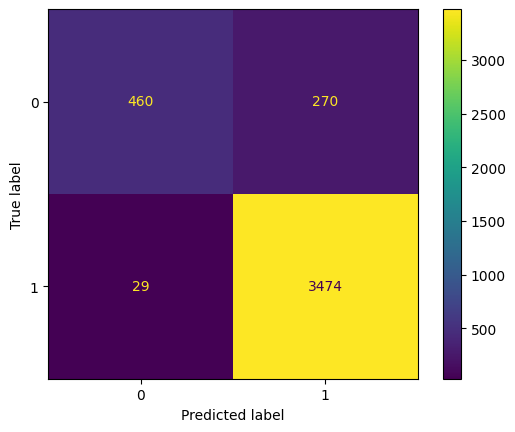

In [49]:
print_cm(y_test,y_pred_rf)

### Logistic Regression Model

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
# checking using randomforest
lr = LogisticRegression()
lr.fit(x_train, y_train_encoded)

# predicting using LGBM model
y_pred_lr = lr.predict(x_test)

d:\college\AIP\Project\Chest-Xray-for-covid-detection\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.8499881880463028
COVID Precision: 0.611764705882353
COVID Recall: 0.3561643835616438
COVID F1 Score: 0.45021645021645024
COVID Support: 730.0
Non-COVID Precision: 0.8765756302521008
Non-COVID Recall: 0.9528975164145018
Non-COVID F1 Score: 0.9131445766652989
Non-COVID Support: 3503.0


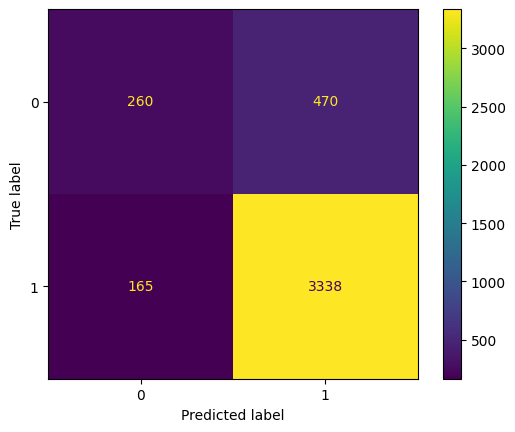

In [52]:
print_cm(y_test,y_pred_lr)

### CNN model

In [72]:
x_train_cnn, x_test_cnn, y_train_cnn, y_test_cnn = train_test_split(x, y, test_size = 0.2, random_state = 42)

print(x_train_cnn.shape, x_test_cnn.shape, y_train_cnn.shape, y_test_cnn.shape)

(16932, 70, 70) (4233, 70, 70) (16932,) (4233,)


In [73]:
x_train_cnn = np.expand_dims(x_train_cnn, axis=-1)
x_test_cnn = np.expand_dims(x_test_cnn, axis=-1)

In [74]:
# Encode labels (COVID and non-COVID) into numerical values
label_encoder_cnn = LabelEncoder()
y_train_encoded_cnn = label_encoder_cnn.fit_transform(y_train_cnn)
y_test_encoded_cnn = label_encoder_cnn.transform(y_test_cnn)

In [75]:
from keras.preprocessing import image
from tensorflow.keras import layers, models
import tensorflow as tf

In [76]:
def create_model(n_classes, train_shape):
    cnn_model = models.Sequential()
    cnn_model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = train_shape))
    cnn_model.add(layers.MaxPooling2D((2, 2)))
    cnn_model.add(layers.Dropout(0.3))

    cnn_model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    cnn_model.add(layers.MaxPooling2D((2, 2)))
    cnn_model.add(layers.Dropout(0.5))

    cnn_model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
    cnn_model.add(layers.Flatten())
    cnn_model.add(layers.Dense(units = 16, activation = 'relu'))
    cnn_model.add(layers.Dropout(0.2))

    cnn_model.add(layers.Dense(units = 2))

    cnn_model.compile(optimizer = 'adam', 
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
               metrics = ['accuracy'])

    cnn_model.summary()
    return cnn_model

In [77]:
input_shape = (70, 70, 1)
n_classes= 2

conv_model = create_model(n_classes, input_shape)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 68, 68, 128)       1280      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 34, 34, 128)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 34, 34, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)       

In [78]:
from livelossplot.inputs.keras import PlotLossesCallback
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [79]:
plot_loss_1 = PlotLossesCallback()

tl_checkpoint_1 = ModelCheckpoint(filepath='tl_model_v1.weights.best.hdf5',
                                  save_best_only=True,
                                  verbose=1)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

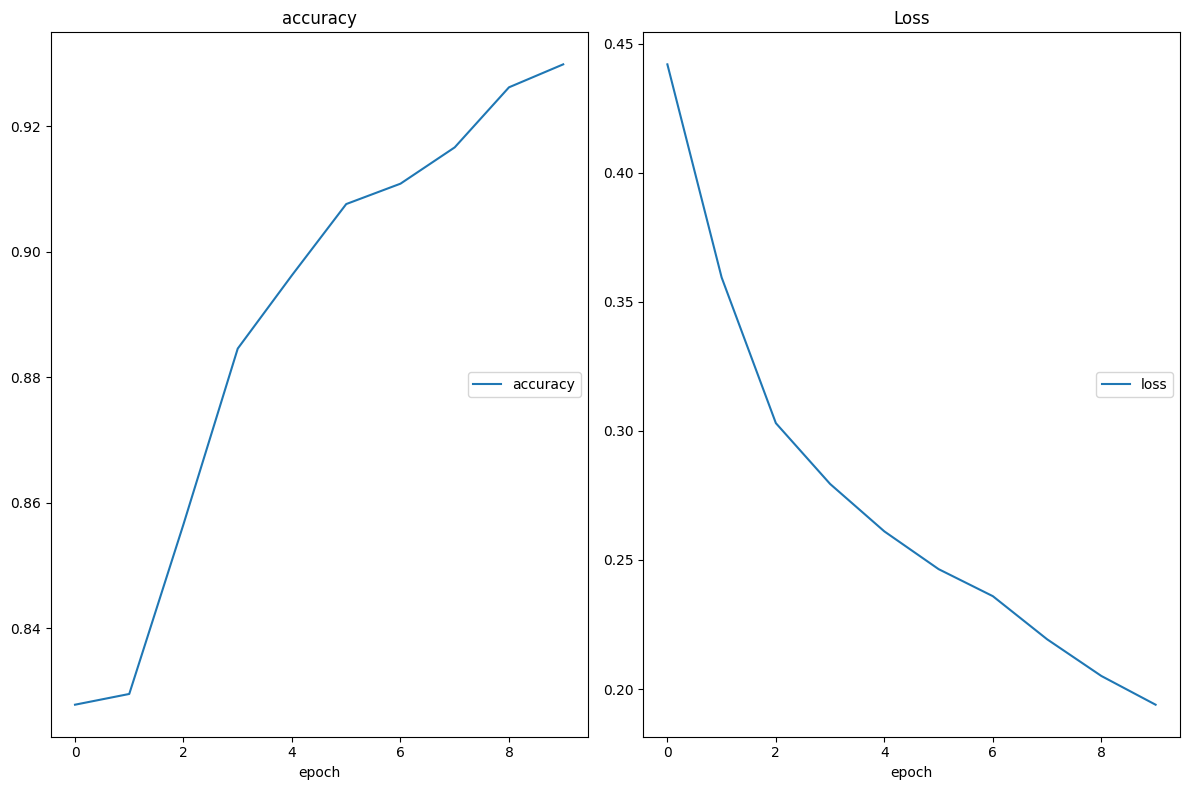

accuracy
	accuracy         	 (min:    0.828, max:    0.930, cur:    0.930)
Loss
	loss             	 (min:    0.194, max:    0.442, cur:    0.194)
133/133 [==============================] - 78s 584ms/step - loss: 0.1939 - accuracy: 0.9299
CPU times: total: 1h 17min 21s
Wall time: 13min 6s


In [81]:
%%time

plot_loss_2 = PlotLossesCallback()

conv_history = conv_model.fit(x_train_cnn, y_train_encoded_cnn, 
                        epochs = 10, batch_size = 128,   
                        callbacks = [tl_checkpoint_1, early_stop, plot_loss_2],
                       verbose=1)

In [82]:
# Evaluate the model
loss, accuracy = conv_model.evaluate(x_test_cnn,y_test_encoded_cnn)

133/133 [==============================] - 6s 43ms/step - loss: 0.1878 - accuracy: 0.9298


In [83]:
# Make predictions
predictions = conv_model.predict(x_test_cnn)
predicted_labels = tf.argmax(predictions, axis=1)

133/133 [==============================] - 6s 43ms/step


Accuracy: 0.9298369950389794
COVID Precision: 0.8739205526770294
COVID Recall: 0.6931506849315069
COVID F1 Score: 0.773109243697479
COVID Support: 730.0
Non-COVID Precision: 0.9386973180076629
Non-COVID Recall: 0.9791607193833857
Non-COVID F1 Score: 0.9585021657118905
Non-COVID Support: 3503.0


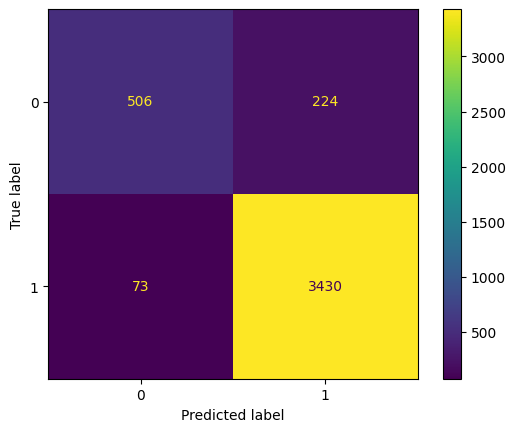

In [84]:
print_cm(y_test_cnn,predicted_labels)